# Emotion

In [34]:
import pandas as pd
from transformers import pipeline
import numpy as np

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df = pd.read_csv('drive/MyDrive/last_words_data_clean.csv')

In [ ]:
df.head()

,name,title,quote,date,context,is_criminal,is_expected,is_religious
0,Archimedes,Greek mathematician,"Do not disturb my circles!""",c. 212 BC,to a Roman soldier who interrupted his geometr...,0.0,0,0
1,Julius Caesar,"Roman dictator (15 March 44 BC), discovering t...","You too, my child?""",NaN,NaN,0.0,1,0
2,Jesus,founder of Christianity,"It is finished.""",c. 33 AD,right before his death by crucifixion,0.0,1,0
3,Joseph Trumpeldor,Jewish Zionist activist,"Never mind, it is good to die for our country.""",1-Mar-20,after being mortally wounded at the Battle of ...,0.0,1,0
4,Stjepan Filipović,Yugoslav communist,"Death to fascism! Freedom to the people!""",22-May-42,seconds before execution by hanging,1.0,1,0


In [ ]:
def get_emotion(text_series):
    texts = text_series.fillna("").astype(str).tolist()
    results = emotion_pipeline(texts)

    labels = [r["label"] for r in results]
    scores = [float(r["score"]) for r in results]

    return pd.DataFrame({
        "primary_emotion_label": labels,
        "primary_emotion_score": scores
    })

In [ ]:
def chunk_text(text, max_words=250):
    words = str(text).split()
    return [
        " ".join(words[i:i + max_words])
        for i in range(0, len(words), max_words)
    ]

emotion_pipeline = pipeline(
    "text-classification",
    model="SamLowe/roberta-base-go_emotions"
)

def get_emotion(text):
    if text is None or str(text).strip() == "":
        return {
            "emotion_label": None,
            "emotion_score": np.nan
        }

    chunks = chunk_text(text)

    best_label = None
    best_score = None

    for c in chunks:
        r = emotion_pipeline(c)[0]
        score = float(r["score"])

        if best_score is None or score > best_score:
            best_label = r["label"]
            best_score = score

    return {
        "emotion_label": best_label,
        "emotion_score": round(best_score, 3) if best_score is not None else np.nan
    }

def apply_emotions(df, col):
    rows = [get_emotion(t) for t in df[col]]
    return pd.DataFrame(rows)


Device set to use cpu


In [ ]:



emotion_df = apply_emotions(df, 'quote')

df = pd.concat([df, emotion_df], axis=1)

print('done')

done


In [ ]:
df.head(10)

,name,title,quote,date,context,is_criminal,is_expected,is_religious,emotion_label,emotion_score
0,Archimedes,Greek mathematician,"Do not disturb my circles!""",c. 212 BC,to a Roman soldier who interrupted his geometr...,0.0,0,0,neutral,0.765
1,Julius Caesar,"Roman dictator (15 March 44 BC), discovering t...","You too, my child?""",NaN,NaN,0.0,1,0,neutral,0.726
2,Jesus,founder of Christianity,"It is finished.""",c. 33 AD,right before his death by crucifixion,0.0,1,0,neutral,0.529
3,Joseph Trumpeldor,Jewish Zionist activist,"Never mind, it is good to die for our country.""",1-Mar-20,after being mortally wounded at the Battle of ...,0.0,1,0,approval,0.460
4,Stjepan Filipović,Yugoslav communist,"Death to fascism! Freedom to the people!""",22-May-42,seconds before execution by hanging,1.0,1,0,anger,0.750
5,Todd Beamer,American passenger on United Airlines Flight 93,Are you guys ready? Let's roll.,11-Sep-01,signaling the start of the revolt against the ...,0.0,1,0,curiosity,0.539
6,Eric Garner,American former horticulturist,I can't breathe.,17-Jul-14,after being put in a chokehold by an arresting...,0.0,0,0,sadness,0.422
7,Ennius,writer and poet of the Roman Republic,"Let no one weep for me, or celebrate my funera...",c. 169 BC,; lines dictated to be engraved on his memoria...,0.0,1,0,sadness,0.792
8,Sejong the Great,king of the Joseon Dynasty,Although dealing with the Japanese and the bar...,30 March 1450,Korea would later be invaded and pillaged by t...,0.0,0,0,caring,0.689
9,Field Marshal Kurt Christoph Graf von Schwerin...,NaN,Let all brave Prussians follow me!,6 May 1757,"at the Battle of Prague, immediately before be...",0.0,1,0,neutral,0.818


# Remorse

In [ ]:

remorse_pipeline = pipeline(
    "text-classification",
    model="SamLowe/roberta-base-go_emotions",
    top_k=None
)

def chunk_text(text, max_words=250):
    words = str(text).split()
    return [
        " ".join(words[i:i+max_words])
        for i in range(0, len(words), max_words)
    ]

def remorse_score(text):
    if text is None or str(text).strip() == "":
        return np.nan

    chunks = chunk_text(text)
    best_score = None

    for c in chunks:
        out = remorse_pipeline(c)

        if isinstance(out[0], dict):
            results = [out[0]]
        else:
            results = out[0]

        for r in results:
            if r["label"].lower() == "remorse":
                score = float(r["score"])
                if best_score is None or score > best_score:
                    best_score = score

    return round(best_score, 3) if best_score is not None else np.nan


df["remorse_score"] = df["quote"].apply(remorse_score)


Device set to use cpu


In [ ]:
df.head()

,name,title,quote,date,context,is_criminal,is_expected,is_religious,emotion_label,emotion_score,remorse_score,year
3,Joseph Trumpeldor,Jewish Zionist activist,"Never mind, it is good to die for our country.""",1-Mar-20,after being mortally wounded at the Battle of ...,0.0,1.0,0,approval,0.460,0.001,2020
5,Todd Beamer,American passenger on United Airlines Flight 93,Are you guys ready? Let's roll.,11-Sep-01,signaling the start of the revolt against the ...,0.0,1.0,0,curiosity,0.539,0.000,2001
6,Eric Garner,American former horticulturist,I can't breathe.,17-Jul-14,after being put in a chokehold by an arresting...,0.0,0.0,0,sadness,0.422,0.003,2014
21,Brandon Vedas (12 January 2003),NaN,I told u I was hardcore [...] u are so fucking...,12-Jan-03,American computer enthusiast talking on IRC du...,0.0,0.0,0,anger,0.653,0.000,2003
22,William Donaldson,British satirist and playboy,"You're a lifesaver, Andy.",22-Jun-05,"to the caretaker of his building, who had coll...",0.0,0.0,0,admiration,0.928,0.000,2005


In [ ]:
df.to_csv('drive/MyDrive/last_words_data_with_emotion2.csv', index=False)

In [53]:
df = pd.read_csv('drive/MyDrive/last_words_data_with_emotion2.csv')

In [55]:
df.shape

(2939, 11)

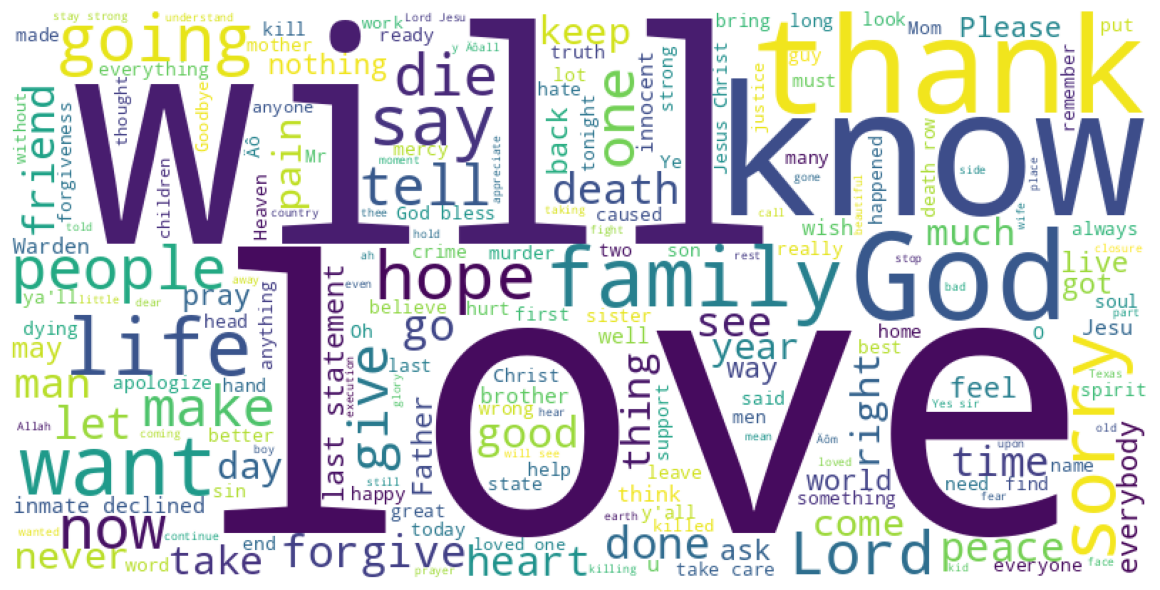

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df["quote"].dropna().astype(str).tolist())

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wc)
plt.axis("off")
plt.tight_layout()
plt.show()

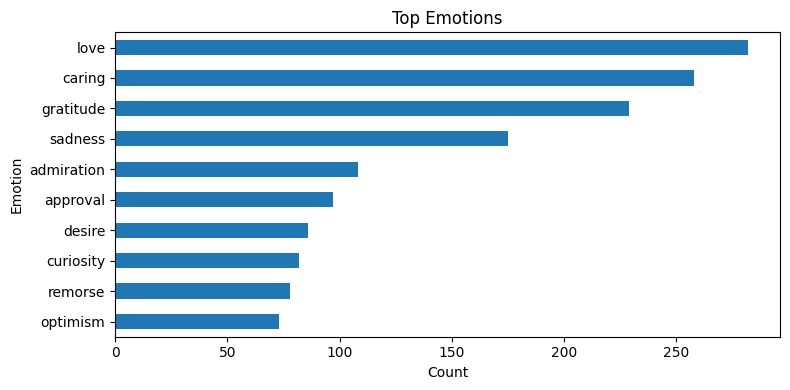

In [95]:
emotion_counts = (
    df["emotion_label"]
    .loc[df["emotion_label"].str.lower() != "neutral"]
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)



plt.figure(figsize=(8, 4))
emotion_counts.plot(kind="barh")
plt.title(f"Top Emotions")
plt.xlabel("Count")
plt.ylabel("Emotion")
plt.tight_layout()
plt.show()

In [38]:
import pandas as pd
import numpy as np
import re

import numpy as np
import pandas as pd
import re

def extract_year(raw):
    if raw is None:
        return np.nan

    s = str(raw).lower().strip()
    if s == "":
        return np.nan

    s = re.sub(r"\[.*?\]|\(.*?\)", "", s)
    s = s.replace("o.s.", "").replace("c.", "").replace("ca.", "").replace("circa", "")
    s = s.replace("?", "").strip()

    century = re.search(r"(\d+)(st|nd|rd|th) century", s)
    if century:
        c = int(century.group(1))
        return -(c - 1) * 100 if "bc" in s else (c - 1) * 100

    if "bc" in s:
        m = re.search(r"\d{1,4}", s)
        return -int(m.group()) if m else np.nan

    s = s.replace("ad", "").strip()

    m4 = re.findall(r"\b\d{4}\b", s)
    if m4:
        return int(m4[-1])

    m2 = re.search(r"\b(\d{2})\b$", s)
    if m2:
        y = int(m2.group(1))
        return 2000 + y if y <= 25 else 1900 + y

    return np.nan

def extract_year_row(row):
    for col in ["date", "title", "context"]:
        y = extract_year(row[col])
        if not pd.isna(y):
            return y
    return np.nan

df["year"] = df.apply(extract_year_row, axis=1)



In [59]:
df.shape

(2939, 11)

In [40]:
df.head()

,name,title,quote,date,context,is_criminal,is_expected,is_religious,emotion_label,emotion_score,remorse_score,year
0,Archimedes,Greek mathematician,"Do not disturb my circles!""",c. 212 BC,to a Roman soldier who interrupted his geometr...,0.0,0,0,neutral,0.765,0.001,-212.0
1,Julius Caesar,"Roman dictator (15 March 44 BC), discovering t...","You too, my child?""",NaN,NaN,0.0,1,0,neutral,0.726,0.001,NaN
2,Jesus,founder of Christianity,"It is finished.""",c. 33 AD,right before his death by crucifixion,0.0,1,0,neutral,0.529,0.000,1933.0
3,Joseph Trumpeldor,Jewish Zionist activist,"Never mind, it is good to die for our country.""",1-Mar-20,after being mortally wounded at the Battle of ...,0.0,1,0,approval,0.460,0.001,2020.0
4,Stjepan Filipović,Yugoslav communist,"Death to fascism! Freedom to the people!""",22-May-42,seconds before execution by hanging,1.0,1,0,anger,0.750,0.001,1942.0


In [41]:
df["is_expected"] = pd.to_numeric(df["is_expected"], errors="coerce")
df["is_criminal"] = pd.to_numeric(df["is_criminal"], errors="coerce")
df["is_religious"] = pd.to_numeric(df["is_religious"], errors="coerce")


criminal_df = df[df['is_criminal']==1]
not_criminal_df = df[df['is_criminal']==0]
expected_df = df[df['is_expected']==1]
not_expected_df = df[df['is_expected']==0]
religion_df = df[df['is_religious']==1]
not_religion_df = df[df['is_religious']==0]
pre_1700_df = df[df["year"] < 1700]
df_1700s = df[(df["year"] >= 1700) & (df["year"] < 1800)]
df_1800s = df[(df["year"] >= 1800) & (df["year"] < 1900)]
df_1900s = df[(df["year"] >= 1900) & (df["year"] < 2000)]
df_2000s = df[df["year"] >= 2000]



In [42]:
df.shape

(2939, 12)

In [43]:
import matplotlib.pyplot as plt

df_list = [criminal_df, not_criminal_df, expected_df, not_expected_df, religion_df, not_religion_df, pre_1700_df, df_1700s, df_1800s, df_1900s, df_2000s]

for df in df_list:
    print(df.shape)

(1212, 12)
(1714, 12)
(1569, 12)
(1355, 12)
(750, 12)
(2189, 12)
(289, 12)
(198, 12)
(551, 12)
(998, 12)
(850, 12)


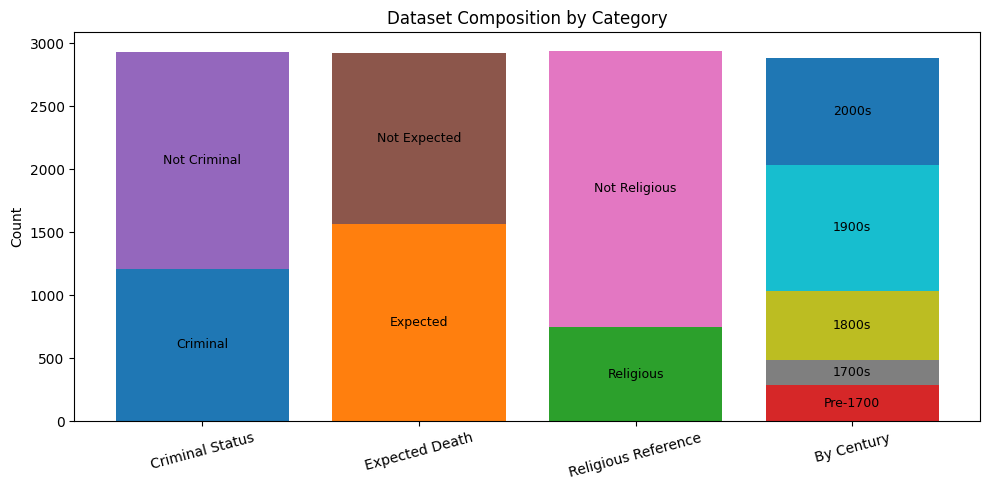

In [92]:
import matplotlib.pyplot as plt

groups = {
    "Criminal Status": [
        ("Criminal", len(criminal_df)),
        ("Not Criminal", len(not_criminal_df)),
    ],
    "Expected Death": [
        ("Expected", len(expected_df)),
        ("Not Expected", len(not_expected_df)),
    ],
    "Religious Reference": [
        ("Religious", len(religion_df)),
        ("Not Religious", len(not_religion_df)),
    ],
    "By Century": [
        ("Pre-1700", len(pre_1700_df)),
        ("1700s", len(df_1700s)),
        ("1800s", len(df_1800s)),
        ("1900s", len(df_1900s)),
        ("2000s", len(df_2000s)),
    ],
}

plt.figure(figsize=(10, 5))

x_pos = list(range(len(groups)))
bottom = [0] * len(groups)

for stack_i in range(max(len(v) for v in groups.values())):

    for bar_i, group_items in enumerate(groups.values()):
        if stack_i >= len(group_items):
            continue

        label, value = group_items[stack_i]

        plt.bar(
            bar_i,
            value,
            bottom=bottom[bar_i]
        )

        y_center = bottom[bar_i] + value / 2

        plt.text(
            bar_i,
            y_center,
            label,
            ha="center",
            va="center",
            fontsize=9
        )

        bottom[bar_i] += value

plt.xticks(x_pos, list(groups.keys()), rotation=15)
plt.title("Dataset Composition by Category")
plt.ylabel("Count")

plt.tight_layout()
plt.show()



In [44]:
df.shape

(850, 12)

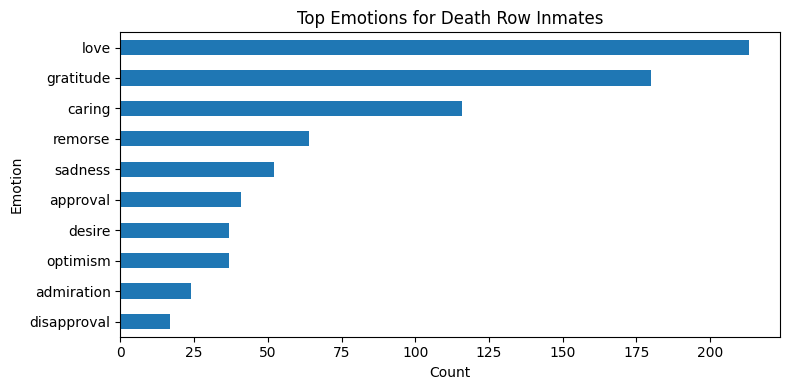

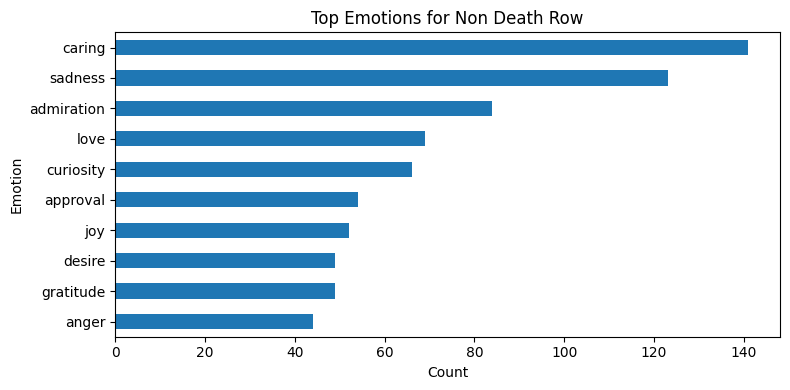

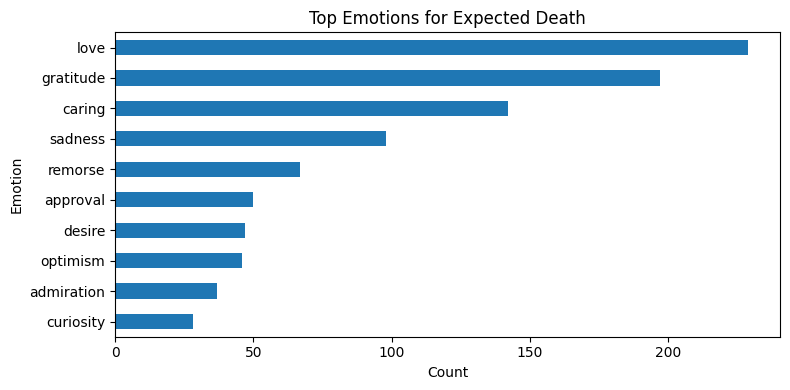

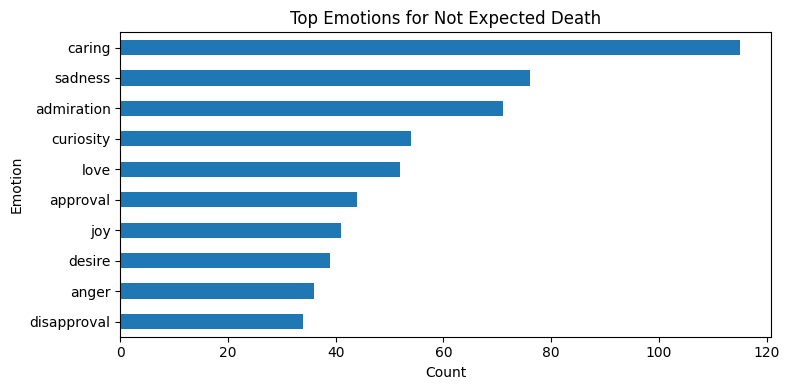

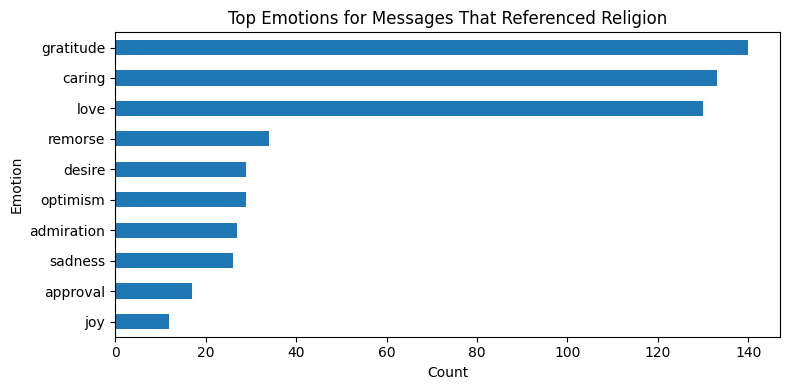

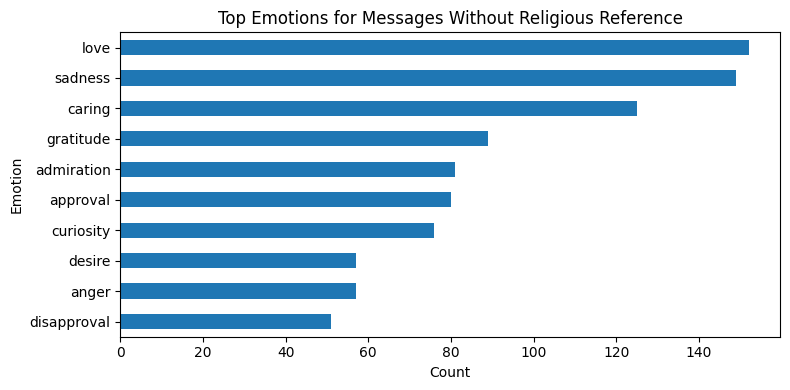

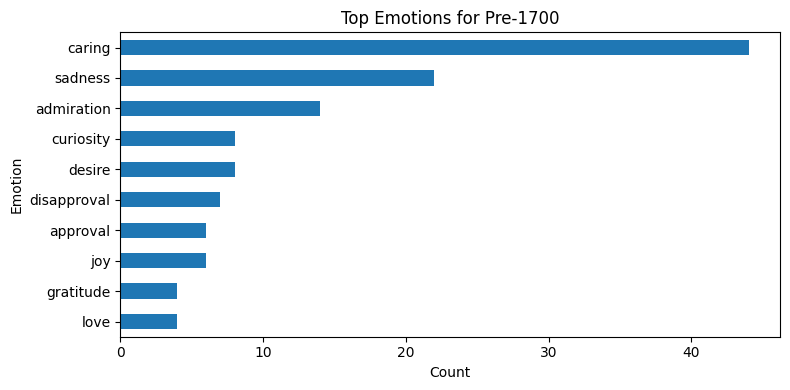

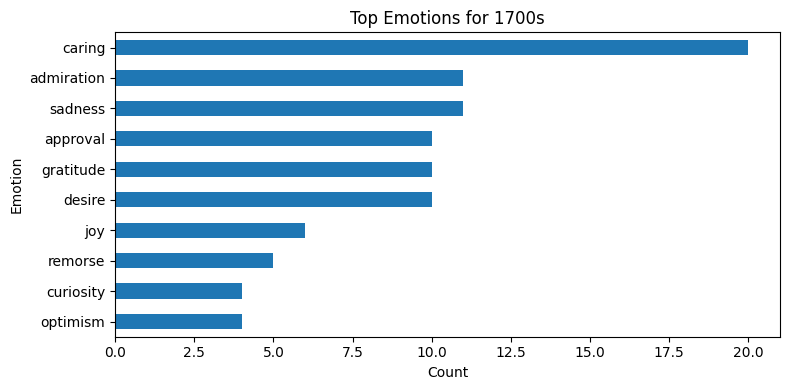

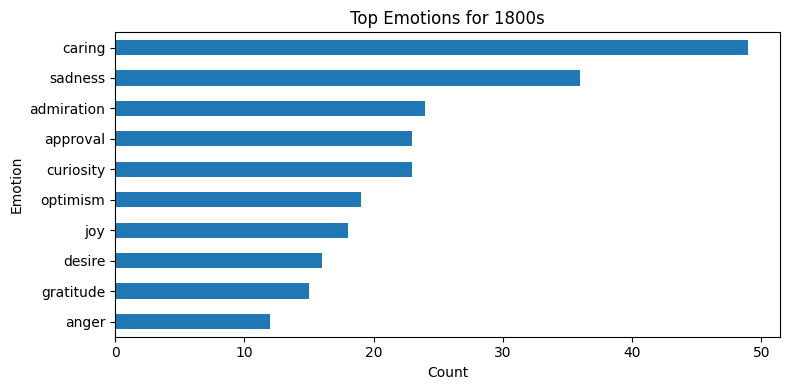

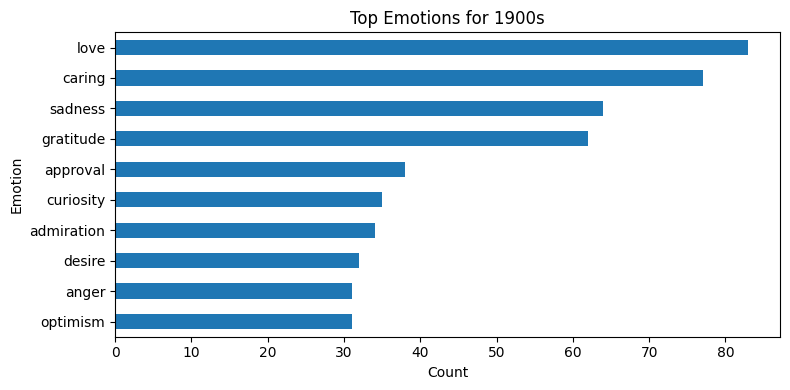

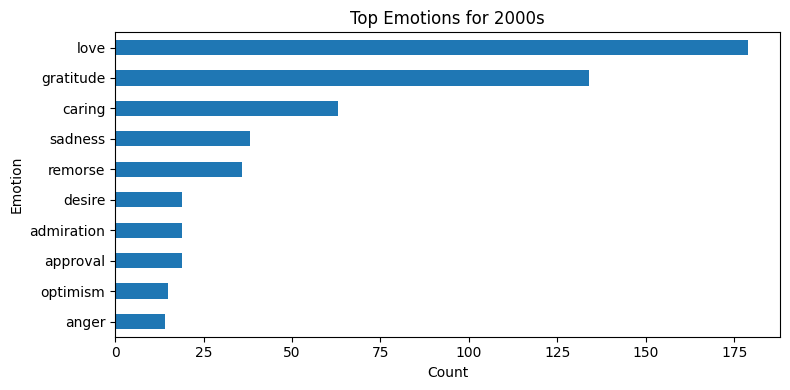

In [98]:
import matplotlib.pyplot as plt

df_list = [
    ("Death Row Inmates", criminal_df),
    ("Non Death Row", not_criminal_df),
    ("Expected Death", expected_df),
    ("Not Expected Death", not_expected_df),
    ("Messages That Referenced Religion", religion_df),
    ("Messages Without Religious Reference", not_religion_df),
    ("Pre-1700", pre_1700_df),
    ("1700s", df_1700s),
    ("1800s", df_1800s),
    ("1900s", df_1900s),
    ("2000s", df_2000s),
]

for name, subdf in df_list:

    if subdf.empty:
        continue

    emotion_counts = (
        subdf["emotion_label"]
        .loc[subdf["emotion_label"].str.lower() != "neutral"]
        .value_counts()
        .head(10)
        .sort_values(ascending=True)
    )

    if emotion_counts.empty:
        continue

    plt.figure(figsize=(8, 4))
    emotion_counts.plot(kind="barh")
    plt.title(f"Top Emotions for {name}")
    plt.xlabel("Count")
    plt.ylabel("Emotion")
    plt.tight_layout()
    plt.show()




In [73]:
for name, subdf in df_list:

    if subdf.empty:
        continue

    emotion_counts = (
        subdf["emotion_label"]
        .loc[subdf["emotion_label"].str.lower() != "neutral"]
        .value_counts()
        .head(10)
        .sort_values(ascending=True)
    )

    print(name)
    print(emotion_counts)



Death Row Inmates
emotion_label
disapproval     17
admiration      24
optimism        37
desire          37
approval        41
sadness         52
remorse         64
caring         116
gratitude      180
love           213
Name: count, dtype: int64
Non Death Row
emotion_label
anger          44
gratitude      49
desire         49
joy            52
approval       54
curiosity      66
love           69
admiration     84
sadness       123
caring        141
Name: count, dtype: int64
Expected
emotion_label
curiosity      28
admiration     37
optimism       46
desire         47
approval       50
remorse        67
sadness        98
caring        142
gratitude     197
love          229
Name: count, dtype: int64
Not Expected
emotion_label
disapproval     34
anger           36
desire          39
joy             41
approval        44
love            52
curiosity       54
admiration      71
sadness         76
caring         115
Name: count, dtype: int64
Messages Referenced Religion
emotion_label
joy

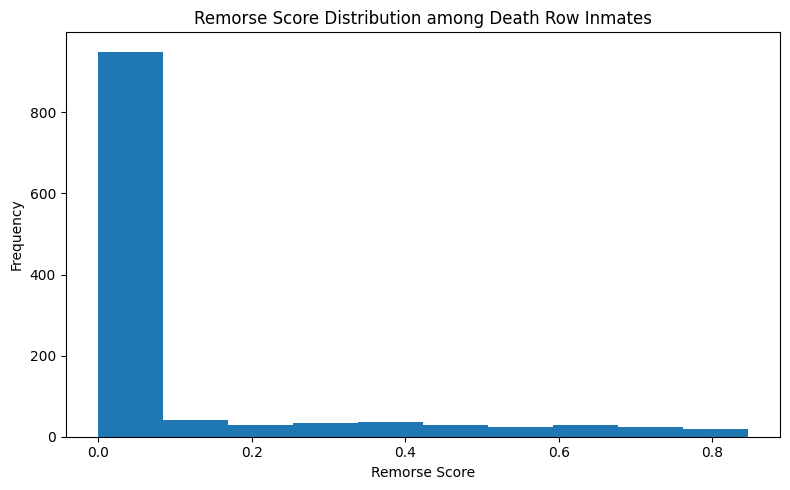

In [76]:
plt.figure(figsize=(8, 5))
plt.hist(criminal_df["remorse_score"].dropna(), bins=10)

plt.title("Remorse Score Distribution among Death Row Inmates")
plt.xlabel("Remorse Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

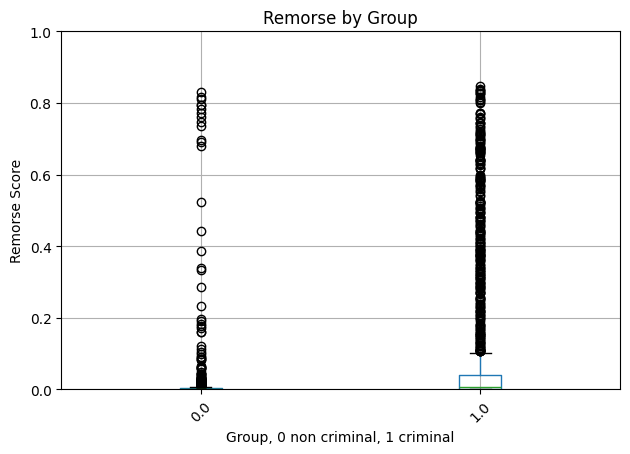

In [66]:
groups = df.dropna(subset=["remorse_score", "is_criminal"])
groups = groups[(groups["is_criminal"] >= 0) & (groups["is_criminal"] <= 1)]

plt.figure(figsize=(10, 5))
groups.boxplot(column="remorse_score", by="is_criminal", rot=45)
plt.title("Remorse by Group")
plt.suptitle("")
plt.xlabel("Group, 0 non criminal, 1 criminal")
plt.ylabel("Remorse Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



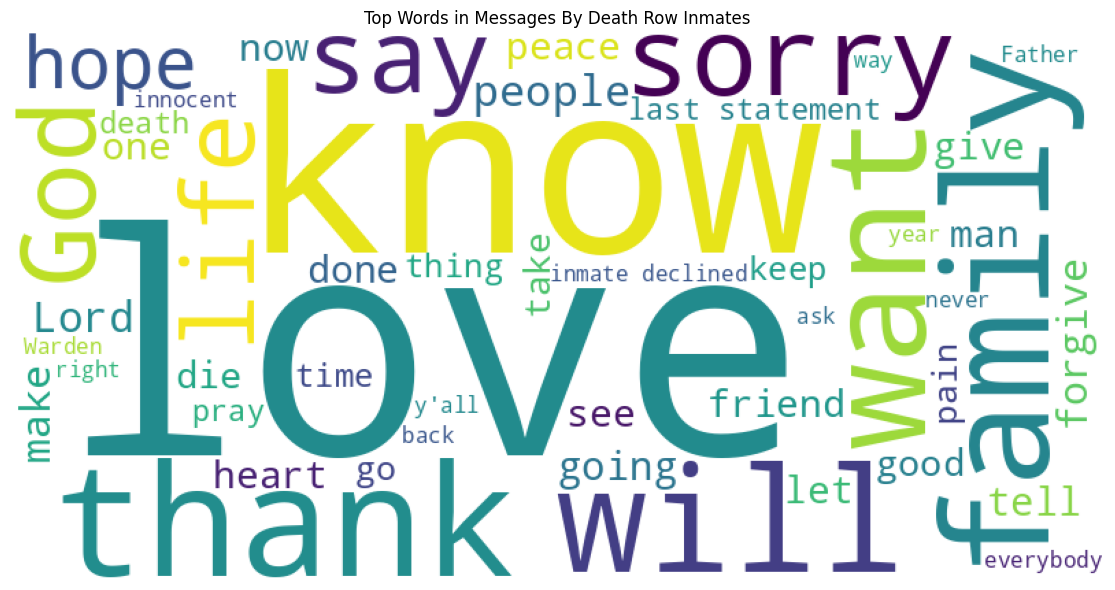

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(criminal_df["quote"].dropna().astype(str).tolist())

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=50
).generate(text)

plt.figure(figsize=(12, 6))
plt.title("Top Words in Messages By Death Row Inmates")
plt.imshow(wc)
plt.axis("off")
plt.tight_layout()
plt.show()

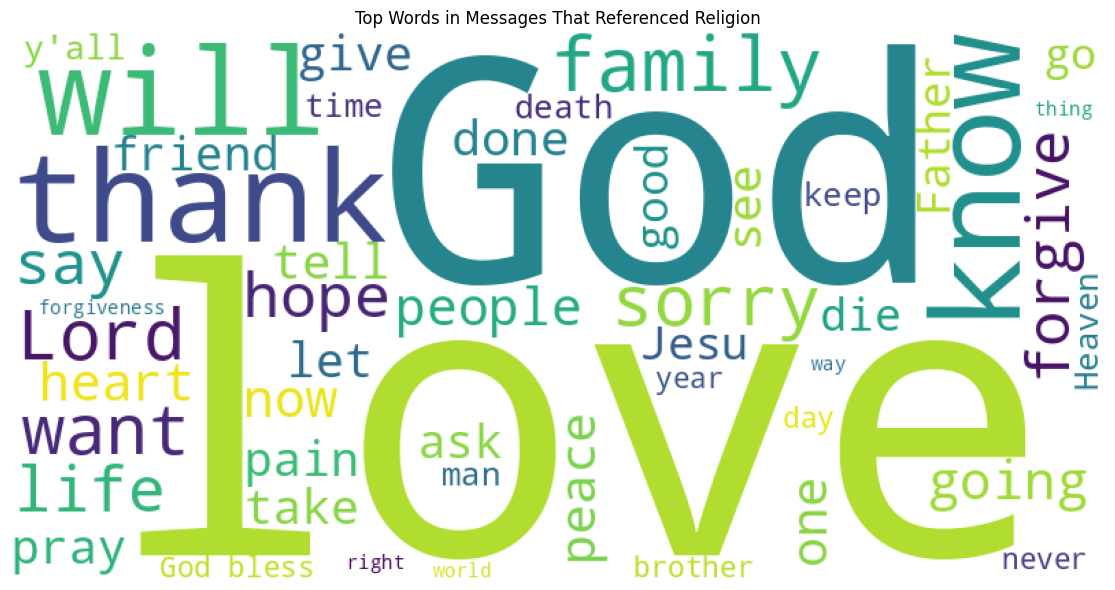

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(religion_df["quote"].dropna().astype(str).tolist())

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=50
).generate(text)

plt.figure(figsize=(12, 6))
plt.title("Top Words in Messages That Referenced Religion")
plt.imshow(wc)
plt.axis("off")
plt.tight_layout()
plt.show()

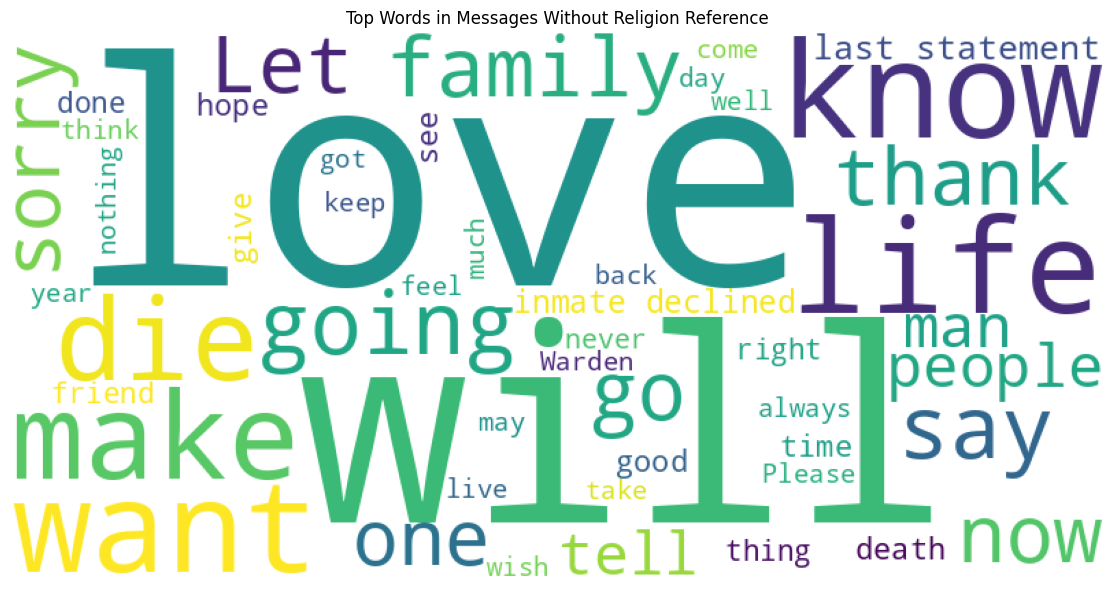

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(not_religion_df["quote"].dropna().astype(str).tolist())

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=50
).generate(text)

plt.figure(figsize=(12, 6))
plt.title("Top Words in Messages Without Religion Reference")
plt.imshow(wc)
plt.axis("off")
plt.tight_layout()
plt.show()